In [1]:
# !pip install tensorflow-gpu
# !pip install tf-explain

In [2]:
import tensorflow as tf
import numpy as np

#Get TensorBoard to run
%load_ext tensorboard

2022-10-27 13:55:05.883290: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-27 13:55:06.170523: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-27 13:55:06.170564: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-27 13:55:06.228705: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-27 13:55:07.501449: W tensorflow/stream_executor/platform/de

In [3]:
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity
from tf_explain.core.activations import ExtractActivations

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

In [4]:
# ОБЯЗАТЕЛЬНО  активируйте функцию запуска с помощью строки ниже после импорта TensorFlow Поскольку приведенное выше устарело 

tf.config.run_functions_eagerly(True)

In [5]:
def download_sample_image(filename):
    import requests
    url = f'https://raw.githubusercontent.com/PracticalDL/Practical-Deep-Learning-Book/master/sample-images/{filename}'
    open(filename, 'wb').write(requests.get(url).content)

In [6]:
IMAGE_PATHS = ['dog.jpg', 'cat.jpg']
for each_filename in IMAGE_PATHS:
    download_sample_image(each_filename)

In [7]:
def display_images(paths):
  # figure size in inches optional
  rcParams['figure.figsize'] = 11 ,8
  
  # read images
  img_A = mpimg.imread(paths[0])
  img_B = mpimg.imread(paths[-1])
  
  # display images
  fig, ax = plt.subplots(1,2)
  ax[0].imshow(img_A);
  ax[1].imshow(img_B);

2022-10-27 13:55:11.517484: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-10-27 13:55:11.517544: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (recpi): /proc/driver/nvidia/version does not exist
2022-10-27 13:55:11.518148: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


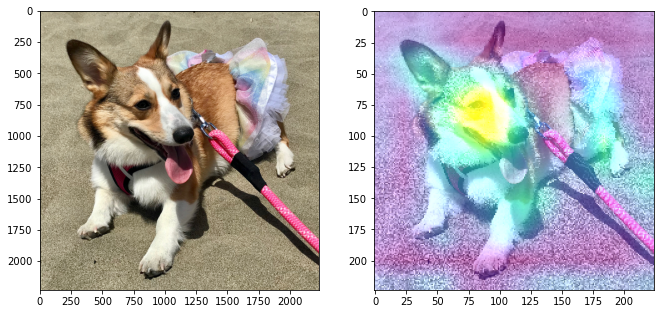

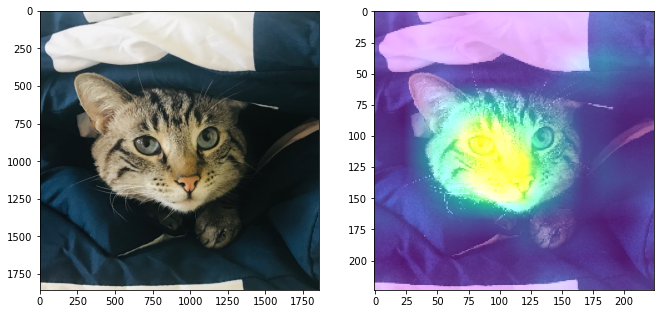

In [8]:
indices = [263, 281]

layers_name = ['activation_6']

from IPython.display import Image

for i in range(len(IMAGE_PATHS)):
    each_path = IMAGE_PATHS[i]
    index = indices[i]

    img = tf.keras.preprocessing.image.load_img(each_path,
                                                target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    data = ([img], None)
    # Define name with which to save the result as
    name = each_path.split("/")[-1].split(".jpg")[0]

    #Save the Grad Cam visualization
    explainer = GradCAM()
    model = tf.keras.applications.vgg16.VGG16(weights='imagenet',
                                              include_top=True)
    grid = explainer.explain(data, model, 'block5_conv3', index)
    explainer.save(grid, '.', name + 'grad_cam.png')
    display_images([each_path, name + 'grad_cam.png'])